# Regresja liniowa: Przykład uczenia nadzorowanego

## Spis treści:
1. [Wprowadzenie](#Wprowadzenie)
2. [Teoria](#Teoria)
3. [Przykład praktyczny](#Przykład-praktyczny)
    - [Dane treningowe](#Dane-treningowe)
    - [Trenowanie modelu](#Trenowanie-modelu)
    - [Testowanie modelu](#Testowanie-modelu)
4. [Podsumowanie](#Podsumowanie)


## Wprowadzenie
Uczenie nadzorowane jest jednym z głównych paradygmatów uczenia maszynowego, w którym model uczy się relacji między danymi wejściowymi, a wyjściowymi na podstawie oznaczonych przykładów.


W uczeniu nadzorowanym mamy zbiór danych treningowych $(x_1, y_1), \dots, (x_n, y_n)$, gdzie $x_i$ to dane wejściowe, a $y_i$

to odpowiadające im etykiety lub wartości docelowe. Celem algorytmu jest znalezienie funkcji $f$, która najlepiej dopasowuje się do danych:

$$
f(x_i) \approx y_i,
$$

dla wszystkich $i$. Funkcja ta może być modelem liniowym (np. regresja liniowa) lub nieliniowym (np. drzewa decyzyjne, sieci neuronowe).


Szukamy funkcji $f$, która minimalizuje $L(f(x), y)$, między przewidywaniami $f(x)$, a rzeczywistymi etykietami $y$.

Dla wielu algorytmów celem jest minimalizacja błędu kwadratowego:

$$
\min_f \frac{1}{n} \sum_{i=1}^n (f(x_i) - y_i)^2.
$$



## Regresja liniowa

W tym notebooku dowiesz się, jak działa uczenie nadzorowane na przykładzie **regresji liniowej**. Model nauczy się przewidywać wartość funkcji matematycznej na podstawie danych wejściowych.


## Teoria
Regresja liniowa opisuje zależność między zmienną niezależną $x$ a zmienną zależną $y$ za pomocą funkcji liniowej:

$$
y = ax + b
$$



### Kluczowe pojęcia:
- **Parametry modelu**:
  - $a$: nachylenie prostej,
  - $b$: wartość przesunięcia (przecięcie osi $ y $).
- **Dane treningowe**: zestaw oznaczonych par $ (x, y) $, które model wykorzystuje do nauki.
- **Dane testowe**: nowe dane, na których model jest testowany, aby sprawdzić jego skuteczność.

<img src="regresja_liniowa_wizualizacja.png" alt="Wizualizacja działania algorytmu regresji liniowej" width="1500"/>






### Minimalizacja błędu:
Celem regresji liniowej jest znalezienie takiej prostej, która minimalizuje **błąd średniokwadratowy (MSE)**, czyli sumę kwadratów odległości między rzeczywistymi wartościami $y$

a przewidywaniami $\hat{y}$ wyznaczonymi przez model. Matematycznie zapisujemy to jako:

$$
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^n (y_i - (ax_i + b))^2
$$

Gdzie:
- $y_i$: rzeczywista wartość $y$,
- $\hat{y}_i = ax_i + b$: przewidywana wartość $y$,
- $n$: liczba punktów danych.

Proces optymalizacji polega na takim doborze parametrów $a$ i $b$, aby minimalizować wartość $MSE$, co zapewnia, że dopasowana prosta najlepiej odwzorowuje dane treningowe.


## Przykład praktyczny
W tym przykładzie użyjemy danych, które są zgodne z funkcją $ y = 2x + 3 $.

### Dane treningowe


In [ ]:
!pip install numpy matplotlib scikit-learn


In [1]:
# Importowanie bibliotek
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dane treningowe
x_train = np.array([1, 2, 3, 4, 6]).reshape(-1, 1)  # Wartości wejściowe (cechy)
y_train = np.array([6, 9, 12, 15, 21])  # Wartości wyjściowe (etykiety)


Dane treningowe są reprezentowane jako punkty na płaszczyźnie $ (x, y) $. Każda para wartości $ x $ i $ y $ tworzy punkt:

- $ x $: wartości wejściowe (np. niezależna zmienna),
- $ y $: wartości wyjściowe (np. zależna zmienna).


Z danych:
$[1, 2, 3, 4, 5] \in \text{x_train}$
$[5, 7, 9, 11, 13] \in \text{y_train}$
Otrzymujemy następujące punkty $(x,y)$:

$$(1,5),
(2,7),
(3,9),
(4,11),
(5,13)$$

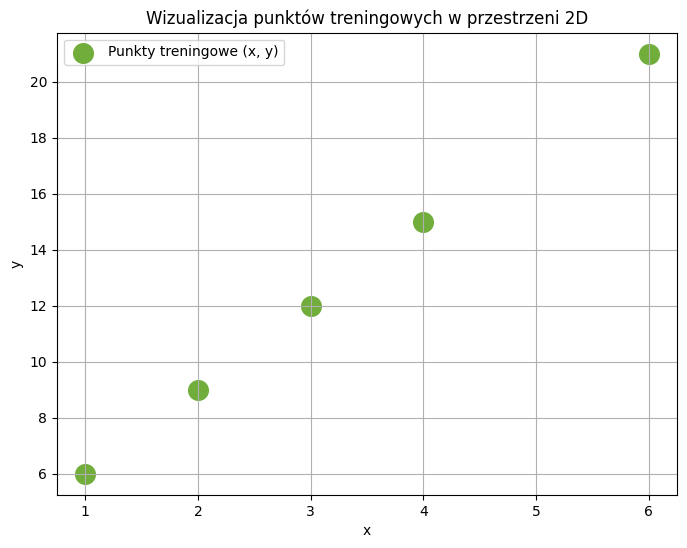

In [3]:
# Wizualizacja punktów w przestrzeni 2D
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color='#71ad3b', label='Punkty treningowe (x, y)', s=200)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Wizualizacja punktów treningowych w przestrzeni 2D')
plt.grid()
plt.legend()
plt.show()


### Trenowanie modelu


Trenowanie modelu polega na znalezieniu wzoru funkcji $f(x)$, która najlepiej opisuje zależność między zmienną niezależną $x$ (cechy) a zmienną zależną $y$ (etykiety). W przypadku regresji liniowej funkcja ta przyjmuje postać:

$$
f(x) = ax + b
$$

Podczas procesu trenowania algorytm szuka takich wartości parametrów $a$ i $b$. Dla regresji liniowej typowym miernikiem tego błędu jest **błąd średniokwadratowy (MSE)**, który definiujemy jako:
$$
MSE(a, b) = \frac{1}{n} \sum_{i=1}^n \big(y_i - (ax_i + b)\big)^2
$$

Gdzie:
- $y_i$: rzeczywiste wartości etykiet,
- $x_i$: dane wejściowe (cechy),
- $n$: liczba punktów danych.



### Implementacja w Pythonie:
W tym przykładzie korzystamy z funkcji `LinearRegression()` z biblioteki `scikit-learn`, która automatycznie znajduje optymalne wartości $a$ i $b$ dla regresji liniowej. Proces ten odbywa się poprzez optymalizację funkcji kosztu (np. minimalizację błędu średniokwadratowego).

In [4]:
# Tworzenie i trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(x_train, y_train)

# Wyciągnięcie współczynników modelu
a = model.coef_[0]
b = model.intercept_
print(f"Model: y = {a:.2f}x + {b:.2f}")


Model: y = 3.00x + 3.00


### Testowanie modelu


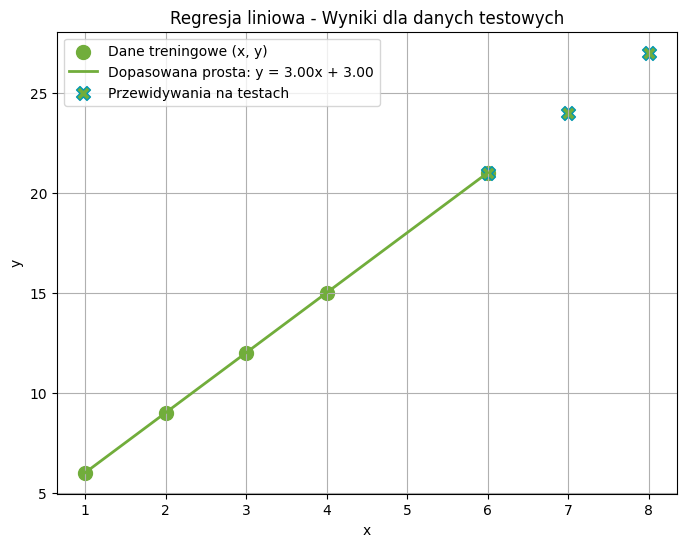

In [5]:
# Trening modelu na nowych danych
model.fit(x_train, y_train)  # Dopasowanie modelu do nowych danych
y_pred_train = model.predict(x_train)  # Przewidywania dla danych treningowych

# Dane testowe
x_test = np.array([6, 7, 8]).reshape(-1, 1)  # Nowe dane wejściowe
y_pred = model.predict(x_test)  # Przewidywania modelu

# Wizualizacja wyników z Twoimi kolorami
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color='#71ad3b', label='Dane treningowe (x, y)', s=100)  # Punkty treningowe
plt.plot(x_train, y_pred_train, color='#71ad3b', label=f'Dopasowana prosta: y = {a:.2f}x + {b:.2f}', linewidth=2)  # Linia regresji
plt.scatter(x_test, y_pred, color='#71ad3b', edgecolor='#0097b2', label='Przewidywania na testach', s=100, marker='X')  # Punkty testowe
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresja liniowa - Wyniki dla danych testowych')
plt.legend()
plt.grid()
plt.show()




In [6]:
# Wyświetlenie wyników w formie tabeli
import pandas as pd
results = pd.DataFrame({
    "x_test": x_test.flatten(),
    "y_pred": y_pred.flatten()
})
results

,x_test,y_pred
0,6,21.0
1,7,24.0
2,8,27.0


## Podsumowanie
W tym notebooku stworzyliśmy model regresji liniowej, który nauczył się zależności $ y = 2x + 3 $ na podstawie danych treningowych. Następnie przetestowaliśmy model na nowych danych, uzyskując poprawne przewidywania.

### Kluczowe wnioski:
- Regresja liniowa dobrze sprawdza się w modelowaniu prostych zależności liniowych.
- Wyniki można wizualizować za pomocą wykresów i tabel.

### Zadanie:
Spróbuj tak zmienić dane wejściowe (dodać, zmodyfikować) aby zobaczyć jak zminiać się będzie dopasowanie lini regresji względem punktów, np:




# Generowanie 30 bardziej rozproszonych punktów
skopiuj kod i wklej na początku przykładu



In [10]:
import numpy as np

np.random.seed(42)

x_train_random = np.random.uniform(0, 10, 30).reshape(-1, 1)
y_train_random = 2 * x_train_random.flatten() + 3 + np.random.normal(0, 5, size=30)

#print (x_train_random)
print (y_train_random)


[ 4.73583449 23.89277622 14.63668539 13.51470093  3.11183975 15.38128133
  4.09418612 15.03496827 19.1350248  11.05723331  4.45600786 12.59984642
 13.00792257  8.23108839 10.32883224  7.5249316   8.50660345 11.98961015
  4.24629042  5.22536176 12.93386404 11.07548834 10.56098442  1.51203609
 13.74181953 16.77810783  3.60886564 16.34307021 20.00328899  8.58540885]


In [15]:
# Tworzenie i trenowanie modelu regresji liniowej
model_random = LinearRegression()
model_random.fit(x_train_random, y_train_random)

# Wyciągnięcie współczynników modelu
a = model_random.coef_[0]
b = model_random.intercept_
print(f"Model: y = {a:.2f}x + {b:.2f}")

Model: y = 1.30x + 5.14


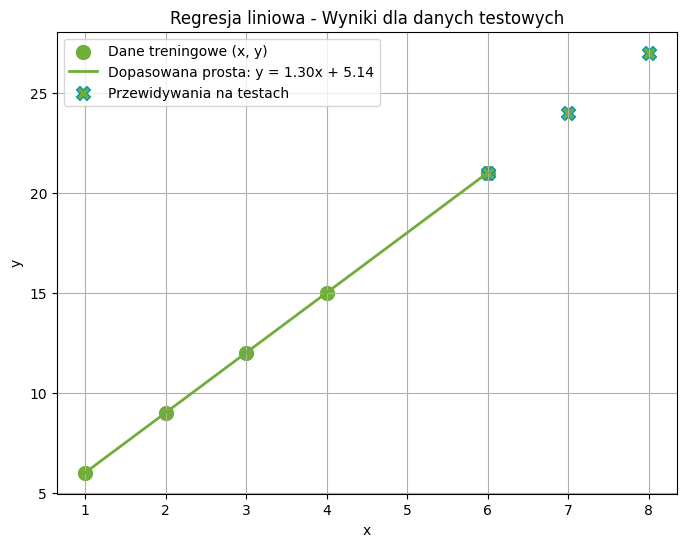

In [17]:
# Trening modelu na nowych danych
model.fit(x_train_random, y_train_random)  # Dopasowanie modelu do nowych danych
y_pred_train_random = model.predict(x_train_random)  # Przewidywania dla danych treningowych

# Dane testowe
x_test_r = np.array(x_train_random).reshape(-1, 1)  # Nowe dane wejściowe
y_pred_r = model.predict(x_test_r)  # Przewidywania modelu

# Wizualizacja wyników z Twoimi kolorami
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color='#71ad3b', label='Dane treningowe (x, y)', s=100)  # Punkty treningowe
plt.plot(x_train, y_pred_train, color='#71ad3b', label=f'Dopasowana prosta: y = {a:.2f}x + {b:.2f}', linewidth=2)  # Linia regresji
plt.scatter(x_test, y_pred, color='#71ad3b', edgecolor='#0097b2', label='Przewidywania na testach', s=100, marker='X')  # Punkty testowe
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresja liniowa - Wyniki dla danych testowych')
plt.legend()
plt.grid()
plt.show()

## Analiza modelu regresji liniowej

### 🔍 Obserwacje z wykresu
- Punkty danych są **mocno rozproszone** wokół dopasowanej prostej.  
- Model regresji liniowej o równaniu  
  $$
  y = 1.30x + 5.14
  $$
  nie odwzorowuje dobrze zmienności danych.  
- Widoczny jest **duży błąd i nierównomierny rozrzut reszt** (punkty nie układają się losowo wokół linii).  

---

### ?? Problem ??
- **Regresja liniowa nie dopasowuje się dobrze do danych.**  
- Możliwe przyczyny:
  - Dane są **nieliniowe** – zależność między `x` i `y` nie jest prostoliniowa.  
  - Dane zawierają **szum** lub **punkty odstające (outliers)**.  

---

### 💡 Propozycje rozwiązań

#### 🔹 1. Sprawdzenie nieliniowości
- Wykonać **wykres reszt** (`y - y_pred` względem `x`).  
- Jeśli pojawia się kształt (np. łuk), spróbować:
  - **regresji wielomianowej** (np. stopień 2 lub 3),
  - **splajnów** lub **modeli nieliniowych** (np. `SVR`, `RandomForestRegressor`).

#### 🔹 2. Oczyszczenie danych
- Usunąć lub ograniczyć wpływ **punktów odstających**.  
- Zastosować **regresję odporną** (*Robust Regression*).

#### 🔹 3. Regularizacja
- Użyć **Ridge** lub **Lasso Regression**, aby ograniczyć wpływ zmiennych o mniejszym znaczeniu.  

#### 🔹 4. Transformacje danych
- Spróbować przekształceń:
  - \( y' = \log(y) \) lub \( x' = \log(x) \),
  - Standaryzacja danych (`StandardScaler`).

---

### Wnioski
- Regresja liniowa jest **dobrym punktem wyjścia**, ale nie zawsze wystarczająca.  
- W przypadku widocznej nieliniowości warto rozważyć **model wielomianowy lub nieliniowy**,  
  aby lepiej odwzorować zależność pomiędzy zmiennymi.


In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

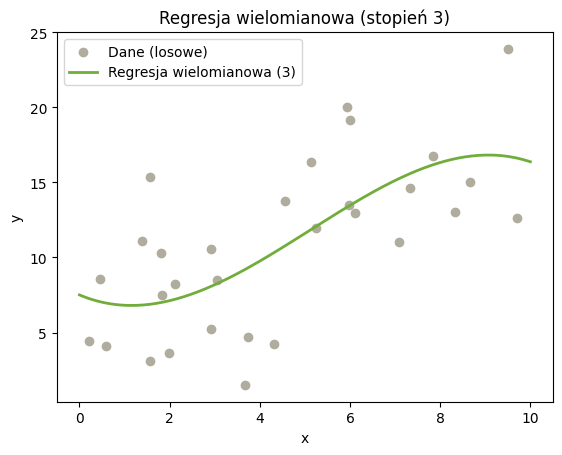

: 

In [ ]:
# Regresja wielomianowa (stopień 3)
model_poly = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model_poly.fit(x_train_random, y_train_random)

# 📈 Predykcja na gęstej siatce
x_plot = np.linspace(0, 10, 200).reshape(-1, 1)
y_plot_poly = model_poly.predict(x_plot)

# 🔎 Wizualizacja
plt.scatter(x_train_random, y_train_random, color='#b0ad9e', label="Dane (losowe)")
plt.plot(x_plot, y_plot_poly, color='#71ad3b', linewidth=2, label="Regresja wielomianowa (3)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresja wielomianowa (stopień 3)")
plt.legend()
plt.show()

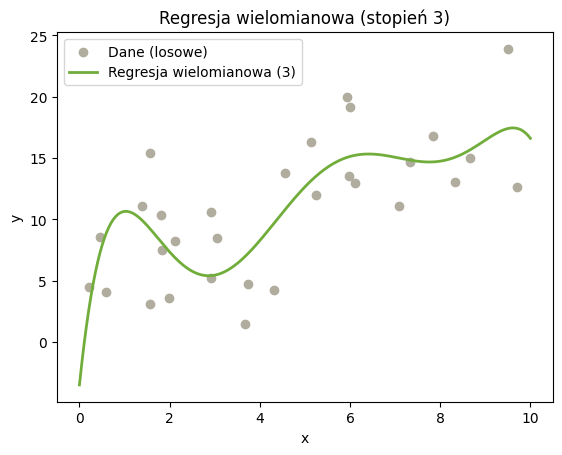

In [ ]:
# Regresja wielomianowa (stopień 6)
model_poly = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
model_poly.fit(x_train_random, y_train_random)

# 📈 Predykcja na gęstej siatce
x_plot = np.linspace(0, 10, 200).reshape(-1, 1)
y_plot_poly = model_poly.predict(x_plot)

# 🔎 Wizualizacja
plt.scatter(x_train_random, y_train_random, color='#b0ad9e', label="Dane (losowe)")
plt.plot(x_plot, y_plot_poly, color='#71ad3b', linewidth=2, label="Regresja wielomianowa (3)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresja wielomianowa (stopień 3)")
plt.legend()
plt.show()

##  Układy równań liniowych w uczeniu maszynowym

Każdy model regresyjny można zapisać w postaci układu równań liniowych:

$$
X \mathbf{w} = \mathbf{y}
$$

gdzie:
- $ X $ – macierz danych (cechy),
- $ \mathbf{w}$ – wektor wag modelu,
- $ \mathbf{y} $ – wektor wartości rzeczywistych (etykiety).

Celem uczenia modelu jest znalezienie takiego $\mathbf{w}$, które **najlepiej przybliża zależność** między danymi wejściowymi a wartościami wyjściowymi.

W idealnym przypadku rozwiązaniem byłoby:
$$
\mathbf{w} = X^{-1} \mathbf{y}
$$

Jednak w praktyce macierz \(X\) często **nie jest kwadratowa ani odwracalna**.  
Dlatego używamy **metody najmniejszych kwadratów (Least Squares)**, która minimalizuje błąd:

$$
E(\mathbf{w}) = ||X\mathbf{w} - \mathbf{y}||^2
$$

Rozwiązanie:
$$
\hat{\mathbf{w}} = (X^T X)^{-1} X^T \mathbf{y}
$$

To właśnie **wzór regresji liniowej**, który wykorzystują algorytmy takie jak:
- `LinearRegression` w scikit-learn,  
- `OLS` (Ordinary Least Squares) w statsmodels,  
- warstwy `Dense` w sieciach neuronowych (dla części liniowej).

---

###  Interpretacja geometryczna

Każdy wiersz macierzy $X$ to punkt (wektor) w przestrzeni cech.  
Uczenie modelu polega na znalezieniu takiego wektora wag $\mathbf{w}$,  
aby prosta lub płaszczyzna $X\mathbf{w}$ **była jak najbliżej punktów danych** (minimalny błąd).

---

###  Wzór w praktyce

W Pythonie możemy obliczyć rozwiązanie układu równań liniowych:
$$
\mathbf{w} = (X^T X)^{-1} X^T \mathbf{y}
$$
i porównać wynik z gotowym modelem z biblioteki scikit-learn.


Współczynnik w (ręcznie obliczony): [2.81818182]
Współczynnik w (scikit-learn): [2.81818182]


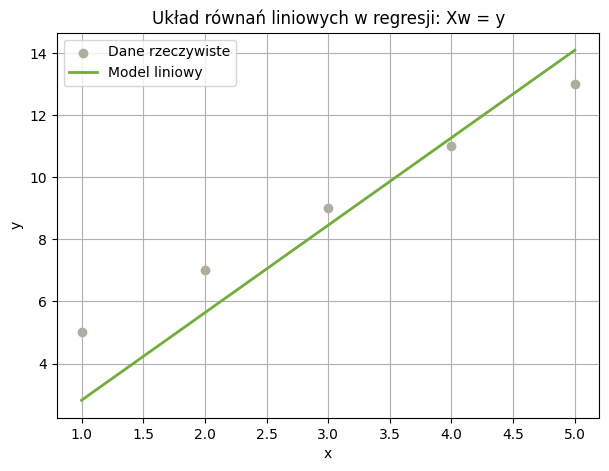

Błąd średniokwadratowy (MSE): 1.6364


In [ ]:
# Rozwiązanie układu Xw = y

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Dane (macierz X i wektor y)
X = np.array([
    [1],
    [2],
    [3],
    [4],
    [5]
])
y = np.array([5, 7, 9, 11, 13])

# Rozwiązanie układu równań Xw = y metodą najmniejszych kwadratów wprost z wzoru
# w = (X^T X)^(-1) X^T y
w = np.linalg.inv(X.T @ X) @ X.T @ y
b = 0  # w tym przykładzie nie dodajemy biasu
print("Współczynnik w (ręcznie obliczony):", w)

#  Predykcja (model liniowy)
y_pred = X @ w + b

# Porównanie z biblioteką scikit-learn
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
print("Współczynnik w (scikit-learn):", model.coef_)

# Wizualizacja
plt.figure(figsize=(7,5))
plt.scatter(X, y, color="#b0ad9e", label="Dane rzeczywiste")
plt.plot(X, y_pred, color="#71ad3b", linewidth=2, label="Model liniowy")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Układ równań liniowych w regresji: Xw = y")
plt.legend()
plt.grid(True)
plt.show()

#  Sprawdzenie błędu (MSE)
mse = np.mean((y - y_pred)**2)
print(f"Błąd średniokwadratowy (MSE): {mse:.4f}")
